In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

## 1.讀入fashion MNIST

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [24]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 2.查看數據集內容

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Pullover


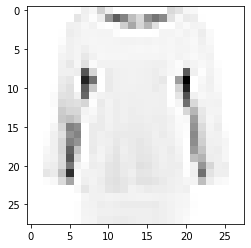

In [25]:
n = 5432
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

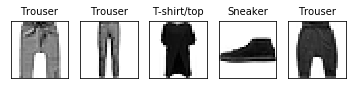

In [10]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

## 3.資料整理

In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_train = x_train.reshape(60000,784)

In [30]:
x_test = x_test.reshape(10000,784)

In [16]:
from tensorflow.keras.utils import to_categorical

In [31]:
y_train = to_categorical(y_train, 10)

In [32]:
y_test = to_categorical(y_test, 10)

In [35]:
y_train[n]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 4.建立神經網路模型

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [37]:
model = Sequential()

In [38]:
model.add(Dense(88, input_dim = 784, activation = 'relu'))

In [39]:
model.add(Dense(821, activation = 'relu'))

In [40]:
model.add(Dense(325, activation = 'relu'))

In [41]:
model.add(Dense(10, activation = 'softmax'))

In [42]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.012), metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 821)               73069     
_________________________________________________________________
dense_2 (Dense)              (None, 325)               267150    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3260      
Total params: 412,559
Trainable params: 412,559
Non-trainable params: 0
_________________________________________________________________


## 5.訓練

In [44]:
model.fit(x_train, y_train, batch_size = 50, epochs = 30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0886 - accuracy: 0.2368
Epoch 2/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0838 - accuracy: 0.4126
Epoch 3/30
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0742 - accuracy: 0.5404
Epoch 4/30
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0605 - accuracy: 0.6133
Epoch 5/30
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0508 - accuracy: 0.6582
Epoch 6/30
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0453 - accuracy: 0.6802
Epoch 7/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0419 - accuracy: 0.7059
Epoch 8/30
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0394 - accuracy: 0.7320
Epoch 9/30
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0374 - accuracy: 0.7510
Epoch 1

## 6.訓練成果

In [45]:
result = model.predict_classes(x_test)

神經網路預測:  Bag


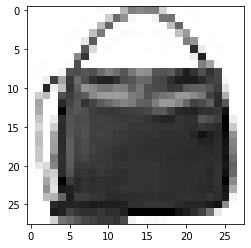

In [85]:
n = 1470
print('神經網路預測: ', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys');